## Please scroll down to chapter 14 to find the solutions for this lab

## Import libraries

In [57]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from imblearn.under_sampling import TomekLinks


import pickle

warnings.filterwarnings('ignore')

## Load data

In [2]:
churndata = pd.read_csv('/Users/yuriawano/lab-handling-data-imbalance-classification/files_for_lab/Customer-Churn.csv')
churndata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
churndata.shape

(7043, 16)

In [4]:
# standardize the header
churndata.columns = [columns.lower() for columns in churndata.columns]

In [5]:
churndata.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Check the datatypes of all the columns in the data. 
You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [6]:
churndata.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
churndata[['totalcharges']] = churndata[['totalcharges']].apply(pd.to_numeric, errors='coerce')
churndata[['totalcharges']]

,totalcharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [8]:
churndata['totalcharges'].dtypes

dtype('float64')

## Deal with null values

In [9]:
churndata.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [10]:
def fill_mean(data, columns):
    """
    data: dataframe
    columns: columns
    return: modified dataframe with mean filled 
    """
    
    for col in columns:
        mean_value = data[columns].mean()
        data[columns] = data[columns].fillna(mean_value)
    
    return data

In [11]:
fill_mean(churndata, ['totalcharges'])

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [12]:
churndata['totalcharges'].isna().sum()

0

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges



In [13]:
data = churndata[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges', 'churn']]

data

,tenure,seniorcitizen,monthlycharges,totalcharges,churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


## Split the data into a training set and a test set.


Here I will split first before normalizing / standardizing so it is similar to real time cases when we want to predict future customers 

In [14]:
X = data.drop('churn', axis =1)
y = data['churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

## Scale the features either by using normalizer or a standard scaler.

### Scale the numericals

In [17]:
transformer = StandardScaler().fit(X_train_num)
x_train_stand = transformer.transform(X_train_num)


# saving in a pickle
with open('num_train_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('num_train_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_n = loaded_transformer.transform(X_train_num)


In [18]:
transformer = StandardScaler().fit(X_test_num)
X_test_n = transformer.transform(X_test_num)

In [19]:
X_train_n.shape, X_test_n.shape

((5634, 4), (1409, 4))

## Fit a logistic regression model on the training data.


In [20]:

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X, y)

LogisticRegression(max_iter=10000, random_state=42)

## Check the accuracy on the test data.

In [21]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.8069552874378992

## Check for the imbalance

In [22]:
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

## Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes

### Upsampling

In [23]:
category_No = data[data['churn'] == 'No']
category_Yes = data[data['churn'] == 'Yes']

In [24]:
category_Yes = category_Yes.sample(len(category_No), replace=True)

In [25]:
print(category_No.shape, category_Yes.shape)

(5174, 5) (5174, 5)


### Downsampling

In [26]:
category_No_down = data[data['churn'] == 'No']
category_Yes_down = data[data['churn'] == 'Yes']

In [27]:
category_No_down = category_No_down.sample(len(category_Yes_down), replace = True)

In [28]:
print(category_No_down.shape, category_Yes_down.shape)

(1869, 5) (1869, 5)


## Each time fit the model and see how the accuracy of the model is

### Upsampling's accuracy

In [29]:
upsample_df = pd.concat([category_No, category_Yes])
upsample_df

,tenure,seniorcitizen,monthlycharges,totalcharges,churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
3,45,0,42.30,1840.75,No
6,22,0,89.10,1949.40,No
7,10,0,29.75,301.90,No
...,...,...,...,...,...
5888,49,0,95.60,4783.50,Yes
4503,17,0,94.40,1617.50,Yes
4531,9,0,79.35,661.25,Yes
1423,15,0,101.10,1504.05,Yes


In [30]:
X_up = upsample_df.drop('churn', axis = 1)
y_up = upsample_df['churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

In [32]:

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_up, y_up)

LogisticRegression(max_iter=10000, random_state=42)

In [33]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.7420289855072464

### Downscaling accuracy

In [34]:
downsample_df = pd.concat([category_No_down, category_Yes_down])
downsample_df

,tenure,seniorcitizen,monthlycharges,totalcharges,churn
2055,45,0,108.45,4964.70,No
6844,29,0,89.65,2623.65,No
5057,9,0,75.85,724.65,No
2846,2,0,62.15,113.10,No
5083,40,0,71.35,2847.20,No
...,...,...,...,...,...
7021,12,0,59.80,727.80,Yes
7026,9,0,44.20,403.35,Yes
7032,1,1,75.75,75.75,Yes
7034,67,0,102.95,6886.25,Yes


In [35]:
X_down = upsample_df.drop('churn', axis = 1)
y_down = upsample_df['churn']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.2, random_state=42)

In [37]:

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_down, y_down)

LogisticRegression(max_iter=10000, random_state=42)

In [38]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.7420289855072464

### Result of upsampling and downsampling score

Same accuracy score is produced and I am not sure if that happens..... 

## Apply SMOTE for upsampling the data

### Use logistic regression to fit the model and compute the accuracy of the model

In [42]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

No     4148
Yes    4148
Name: churn, dtype: int64

In [43]:
X_sm.shape, y_sm.shape, X_test.shape, y_test.shape

((8296, 4), (8296,), (2070, 4), (2070,))

In [44]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [45]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.7391304347826086

In [49]:

print(classification_report(y_test, classification.predict(X_test)))

              precision    recall  f1-score   support

          No       0.75      0.73      0.74      1044
         Yes       0.73      0.75      0.74      1026

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



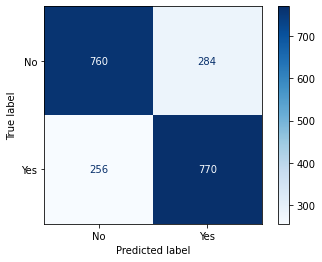

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

### Use decision tree classifier to fit the model and compute the accuracy of the model

In [54]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.831263696128561

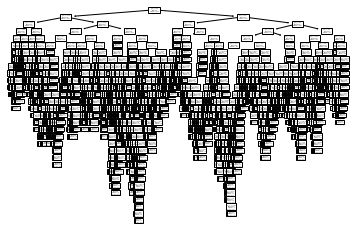

In [55]:
from sklearn import tree

tree.plot_tree(model);

### Compare the accuracies of the two models

Decision tree Classifier can predict better (score: 0.831) than logistic regression (score: 0.739)

## Apply TomekLinks for downsampling



It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.

### Use logistic regression to fit the model and compute the accuracy of the model

In [58]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4620
Yes    1869
Name: churn, dtype: int64

In [59]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [60]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.7352081811541271

In [61]:

print(classification_report(y_test, classification.predict(X_test)))

              precision    recall  f1-score   support

          No       0.73      0.73      0.73      1349
         Yes       0.74      0.74      0.74      1389

    accuracy                           0.74      2738
   macro avg       0.74      0.74      0.74      2738
weighted avg       0.74      0.74      0.74      2738



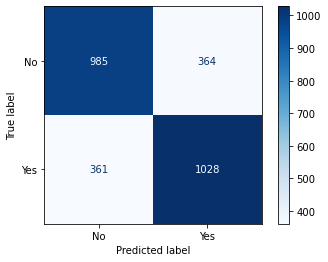

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

### Use decision tree classifier to fit the model and compute the accuracy of the model.

In [63]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7329598506069094

### Compare the accuracies of the two models.

Results are almost the same.

### You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [64]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7362278244631186

It is slightly different but i am not sure if I have applied correctly....??